# Recommender Systems
- recomend movie

### 1. Loading of data
- load matlab file

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from tqdm import tqdm_notebook as tqdm

In [2]:
mat3 = loadmat("ex8_movies.mat")
mat4 = loadmat("ex8_movieParams.mat")

- Y : containing ratings (1-5) of 1682 movies on 943 user
- R : R(i,j)=1, if user j give rating to movie i
- X : num_movies * num_features
- Theta : num_users * num_features

In [3]:
Y = mat3["Y"] #1682x943, 평점
R = mat3["R"] #1682x943, 평점 유무

In [4]:
X = mat4["X"] #1682x10, 영화수xfeature
Theta = mat4["Theta"] #943x10, 유저수xfeature

- compute average rating of first movie(toy story)

In [5]:
# 토이스토리에 대한 전체 평점 평균

total_score = np.sum(Y[0,:]*R[0,:]) # 평점x평점이 있는 경우, cf. 평점이 없는 경우 0점이므로 Y[0,:]만 더해도 가능
mean = total_score / np.sum(R[0,:]) # 평균 = 전체평점 / 평점이 있는 경우의 합
print("Average rating for movie 1 (Toy Story):",mean,"/5")

Average rating for movie 1 (Toy Story): 3.8783185840707963 /5


### 2. Visualise the ratings matrix
- imshow() : color data of 2-dimensional array
- to below example, we know default value about imshow()
- in order, from 0 to 5

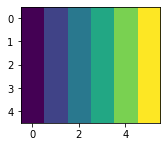

In [6]:
# 0~5점 시각화 예시, 왼쪽부터 0점

ar = [[0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3,4,5]]
plt.figure(figsize=(2.5,3))
plt.imshow(ar)

Text(0, 0.5, 'Movies')

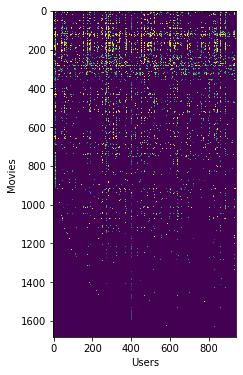

In [7]:
# 영화 평점 시각화
# X축 : 유저, Y축 : 영화

plt.figure(figsize=(5,6))
plt.imshow(Y)
plt.xlabel("Users")
plt.ylabel("Movies")

### 3. Collaborative Filtering Learning Algorithm
- make function
- compute cost function, gradient
- cf. unregularized vs regularized
![title](collaborative.png)
![title](collaborative2.png)

In [8]:
def costfunction(params, Y, R, num_users, num_movies, num_features, Lambda) :
    X = params[:num_movies*num_features].reshape(num_movies,num_features)
    Theta = params[num_movies*num_features:].reshape(num_users,num_features)
    
    predictions = X @ Theta.T
    err = (predictions - Y)
    
    J = 1/2 * np.sum((err**2)*R)
    
    reg_X = Lambda/2 * np.sum(Theta**2)
    reg_Theta = Lambda/2 * np.sum(X**2)
    reg_J = J + reg_X + reg_Theta
    
    grad, reg_grad = gradient_descent(params, Y, R, num_users, num_movies, num_features, Lambda)
    
    return J, grad, reg_J, reg_grad

In [9]:
def gradient_descent(params, Y, R, num_users, num_movies, num_features, Lambda) :
    X = params[:num_movies*num_features].reshape(num_movies,num_features)
    Theta = params[num_movies*num_features:].reshape(num_users,num_features)
    
    predictions = X @ Theta.T
    err = (predictions - Y)
    
    X_grad = err*R @ Theta
    Theta_grad = (err*R).T @ X
    grad = np.append(X_grad.flatten(),Theta_grad.flatten())
    
    reg_X_grad = X_grad + Lambda*X
    reg_Theta_grad = Theta_grad + Lambda*Theta
    reg_grad = np.append(reg_X_grad.flatten(),reg_Theta_grad.flatten())
    
    return grad, reg_grad

- __make example__
- test set
- users : 4, movies : 5, features : 3

In [10]:
num_users, num_movies, num_features = 4,5,3
X_test = X[:num_movies,:num_features]
Theta_test= Theta[:num_users,:num_features]
Y_test = Y[:num_movies,:num_users]
R_test = R[:num_movies,:num_users]
params = np.append(X_test.flatten(),Theta_test.flatten())

- compare unregularized to regularized with lambda
- [:2] : from index 0, total 2
- [2:] : from index 2 to last 

In [11]:
#J, grad = costfunction(params, Y_test, R_test, num_users, num_movies, num_features, 1.5)[:2]
#print("Cost at loaded parameters:",J)

#J2, grad2 = costfunction(params, Y_test, R_test, num_users, num_movies, num_features, 1.5)[2:]
#print("Cost at loaded parameters (lambda = 1.5):",J2)

J, grad, J_reg, grad_reg = costfunction(params, Y_test, R_test, num_users, num_movies, num_features, 1.5)

print("Cost at loaded parameters:",J)
print("Cost at loaded parameters (lambda = 1.5):",J_reg)

Cost at loaded parameters: 22.224603725685675
Cost at loaded parameters (lambda = 1.5): 31.34405624427422


### 4.Learning movie recommendations
- sys : library, direct control of the variables and functions provided by the Python Interpreter.
![title](movieList.png)

In [12]:
#import sys
movieList = open("movie_ids.txt","rt",encoding='UTF8').read().split("\n")
#np.set_printoptions(threshold=sys.maxsize)
movieList[:5]

['1 Toy Story (1995)',
 '2 GoldenEye (1995)',
 '3 Four Rooms (1995)',
 '4 Get Shorty (1995)',
 '5 Copycat (1995)']

- Initialize my ratings
- Create own ratings

In [13]:
my_ratings = np.zeros((1682,1))

my_ratings[0] = 4
my_ratings[97] = 2
my_ratings[6] = 3
my_ratings[11]= 5
my_ratings[53] = 4
my_ratings[63]= 5
my_ratings[65]= 3
my_ratings[68] = 5
my_ratings[82]= 4
my_ratings[225] = 5
my_ratings[354]= 5

print("- New user ratings -")
for i in range(len(my_ratings)) :
    if my_ratings[i] > 0 :
        print("rating of", movieList[i], ":", int(my_ratings[i]))

- New user ratings -
rating of 1 Toy Story (1995) : 4
rating of 7 Twelve Monkeys (1995) : 3
rating of 12 Usual Suspects, The (1995) : 5
rating of 54 Outbreak (1995) : 4
rating of 64 Shawshank Redemption, The (1994) : 5
rating of 66 While You Were Sleeping (1995) : 3
rating of 69 Forrest Gump (1994) : 5
rating of 83 Much Ado About Nothing (1993) : 4
rating of 98 Silence of the Lambs, The (1991) : 2
rating of 226 Die Hard 2 (1990) : 5
rating of 355 Sphere (1998) : 5


### 5. Recommendations
- use above example
- make function
- compute mean normalization
- (θj)T xi + μi
- Ymean : mean vector
- Ynorm : Y - Ymean, new Y matrix
- m : movie
- n : user

In [14]:
def normalizeRatings(Y, R) :
    m,n = Y.shape[0], Y.shape[1]
    Ymean = np.zeros((m,1))
    Ynorm = np.zeros((m,n))
    
    for i in range(m) :
        Ymean[i] = np.sum(Y[i,:])/np.count_nonzero(R[i,:])
        Ynorm[i,R[i,:]==1] = Ynorm[i,R[i,:]==1] - Ymean[i]
        
    return Ynorm, Ymean

- to minimize costfunction, improve X, Theta
- alpha : learning rate

In [15]:
def gradientDescent2(initial_parameters,Y,R,num_users,num_movies,num_features,alpha,num_iters,Lambda):
    X = initial_parameters[:num_movies*num_features].reshape(num_movies,num_features)
    Theta = initial_parameters[num_movies*num_features:].reshape(num_users,num_features)
    
    J_history =[]
    
    for i in tqdm(range(num_iters)):
        params = np.append(X.flatten(),Theta.flatten())
        cost, grad = costfunction(params, Y, R, num_users, num_movies, num_features, Lambda)[2:]

        X_grad = grad[:num_movies*num_features].reshape(num_movies,num_features)
        Theta_grad = grad[num_movies*num_features:].reshape(num_users,num_features)
        X = X - (alpha * X_grad)
        Theta = Theta - (alpha * Theta_grad)
        J_history.append(cost)
    
    paramsFinal = np.append(X.flatten(),Theta.flatten())
    return paramsFinal , J_history

In [16]:
Y = np.hstack((my_ratings,Y))
R =np.hstack((my_ratings!=0,R))

Ynorm, Ymean = normalizeRatings(Y, R)

- X, Theta initialize random
- np.random.rand(m,n) : m x n matrix, Standard regular distribution

In [17]:
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10

X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)
initial_parameters = np.append(X.flatten(),Theta.flatten())
Lambda = 10

paramsFinal, J_history = gradientDescent2(initial_parameters,Y,R,num_users,num_movies,num_features,0.001,400,Lambda)

### 6. Ploting of cost function
- iteration : 400

Text(0.5, 1.0, 'Cost function using Gradient Descent')

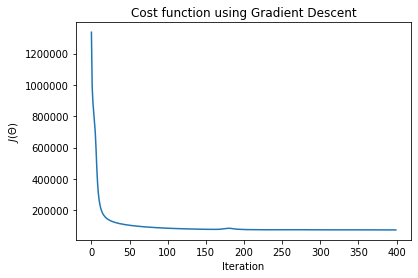

In [18]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

- predict rating

In [19]:
X = paramsFinal[:num_movies*num_features].reshape(num_movies,num_features)
Theta = paramsFinal[num_movies*num_features:].reshape(num_users,num_features)

p = X @ Theta.T
my_predictions = p[:,0][:,np.newaxis] + Ymean

In [20]:
import pandas as pd

df = pd.DataFrame(np.hstack((my_predictions,np.array(movieList)[:,np.newaxis])))
df.sort_values(by=[0],ascending=False,inplace=True)
df.reset_index(drop=True,inplace=True)

In [21]:
print("- Top recommendations for you -")
for i in range(10):
    print("Predicting rating of",df[1][i], ":", round(float(df[0][i]),1))

- Top recommendations for you -
Predicting rating of 64 Shawshank Redemption, The (1994) : 8.4
Predicting rating of 313 Titanic (1997) : 8.4
Predicting rating of 318 Schindler's List (1993) : 8.3
Predicting rating of 272 Good Will Hunting (1997) : 8.2
Predicting rating of 174 Raiders of the Lost Ark (1981) : 8.2
Predicting rating of 12 Usual Suspects, The (1995) : 8.1
Predicting rating of 483 Casablanca (1942) : 8.0
Predicting rating of 127 Godfather, The (1972) : 8.0
Predicting rating of 408 Close Shave, A (1995) : 8.0
Predicting rating of 22 Braveheart (1995) : 8.0


## * *Bonus movie recommendation for you!*

1. load data

In [49]:
Y = mat3["Y"] #1682x943, 평점
R = mat3["R"] #1682x943, 평점 유무
X = mat4["X"] #1682x10, 영화수xfeature
Theta = mat4["Theta"] #943x10, 유저수xfeature

2. function

- #1 including new user, Y matrix reconstruction
    - Mean Normalization
    - Ynorm_new = Y - Ymean_new
- #5 평점 예측 정렬
    - 예외처리 : 이미 평점을 준 경우, 영화 추천 목록에서 빠지도록

In [53]:
def make_recommender(new_ratings, Y, R, X, Theta) :
    # 1
    Y = np.hstack((my_score,Y)) #1682x1 + 1682x943 = 1682x944
    # my_score!=0 : false, true
    R = np.hstack((my_score!=0,R)) #1682x1 + 1682X943 = 1682x944

    Ynorm_new, Ymean_new = normalizeRatings(Y, R)
    
    #2
    num_users = Y.shape[1] # 944, 943에서 new user가 추가됨
    num_movies = Y.shape[0] # 1682
    num_features = 10

    X = np.random.randn(num_movies, num_features)
    Theta = np.random.randn(num_users, num_features)

    initial_parameters = np.append(X.flatten(),Theta.flatten())
    Lambda = 10

    paramsFinal, J_history = gradientDescent2(initial_parameters,Y,R,num_users,num_movies,num_features,0.001,400,Lambda)
    
    # 3
    plt.plot(J_history)
    plt.xlabel("Iteration")
    plt.ylabel("$J(\Theta)$")
    plt.title("Cost function using Gradient Descent")
    
    #4
    X = paramsFinal[:num_movies*num_features].reshape(num_movies,num_features)
    Theta = paramsFinal[num_movies*num_features:].reshape(num_users,num_features)

    p = X @ Theta.T
    my_predictions = p[:,0][:,np.newaxis] + Ymean
    
    #5
    df = pd.DataFrame(np.hstack((my_predictions,np.array(movieList)[:,np.newaxis])))

    # 유저가 이미 평점을 준 경우는 제외하기 위해
    # my_score에 점수가 있는 경우, 0으로 값을 바꿔줌
    #for i in tqdm(range (1682)) :
    for i in range(1682) :
        if my_score[i] != 0 :
                df[0][i] = "0"
            
    df.sort_values(by=[0],ascending=False,inplace=True)
    df.reset_index(drop=True,inplace=True)
    
    #6
    print("- Top recommendations for you -")
    for i in range(10):
        print("Predicting rating of",df[1][i], ":", round(float(df[0][i]),1))

3. new user's rating

In [54]:
my_score = np.zeros((1682,1))

# 총 10개 영화

my_score[0] = 5 #토이스토리
my_score[28] = 1 #Batman Forever
my_score[49] = 2 #Star Wars
my_score[262]= 4 #Steel
my_score[271] = 5 #Good Will Hunting
my_score[312]= 5 #Titanic
my_score[404]= 3 #Mission: Impossible
my_score[420] = 4 #William Shakespeare's Romeo and Juliet
my_score[486]= 5 #Roman Holiday
my_score[615] = 1 #Night of the Living Dead


print("- New user ratings -")
for i in range(len(my_score)) :
    if my_score[i] > 0 :
        print("rating of", movieList[i], ":", int(my_score[i]))
        

- New user ratings -
rating of 1 Toy Story (1995) : 5
rating of 29 Batman Forever (1995) : 1
rating of 50 Star Wars (1977) : 2
rating of 263 Steel (1997) : 4
rating of 272 Good Will Hunting (1997) : 5
rating of 313 Titanic (1997) : 5
rating of 405 Mission: Impossible (1996) : 3
rating of 421 William Shakespeare's Romeo and Juliet (1996) : 4
rating of 487 Roman Holiday (1953) : 5
rating of 616 Night of the Living Dead (1968) : 1


4. use function, compute movie recommendation


- Top recommendations for you -
Predicting rating of 318 Schindler's List (1993) : 8.0
Predicting rating of 64 Shawshank Redemption, The (1994) : 7.8
Predicting rating of 483 Casablanca (1942) : 7.6
Predicting rating of 408 Close Shave, A (1995) : 7.6
Predicting rating of 316 As Good As It Gets (1997) : 7.5
Predicting rating of 12 Usual Suspects, The (1995) : 7.5
Predicting rating of 515 Boot, Das (1981) : 7.4
Predicting rating of 22 Braveheart (1995) : 7.4
Predicting rating of 169 Wrong Trousers, The (1993) : 7.4
Predicting rating of 127 Godfather, The (1972) : 7.3


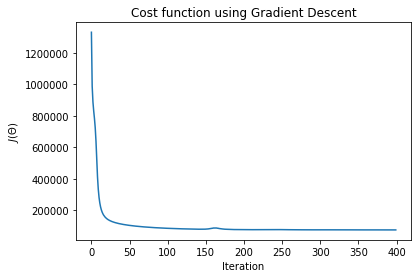

In [55]:
make_recommender(my_score, Y, R, X, Theta)